In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

W0813 19:05:17.577517 4457801152 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 19:05:17.660233 4457801152 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 19:05:17.678136 4457801152 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
# compilation step

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

W0813 19:07:53.979593 4457801152 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 19:07:54.027578 4457801152 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [5]:
# preparing/reshaping image data

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
# preparing labels

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

W0813 19:11:38.985946 4457801152 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0813 19:11:39.063780 4457801152 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2556 - acc: 0.9267
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.1018 - acc: 0.9701
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0669 - acc: 0.9803
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0493 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0369 - acc: 0.9891


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 42us/step
test_acc: 0.9761


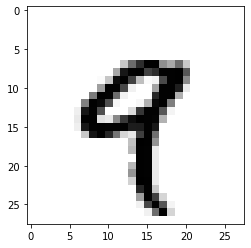

In [12]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show();

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [1]:
# import numpy as np

# np_load_old = np.load

# np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

!pip install numpy==1.16.1
import numpy as np

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
# to decode reviews back to English, large dataset to download

# word_index = imdb.get_word_index()
# reverse_word_index = dict(
#     [(value, key) for (key, value) in word_index.items()])
# decoded_review = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0815 09:29:35.057540 4587169216 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 09:29:35.129854 4587169216 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 09:29:35.137669 4587169216 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

W0815 09:46:18.076689 4587169216 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 09:46:18.135352 4587169216 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0815 09:46:18.150337 4587169216 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0815 09:52:52.557916 4587169216 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 292us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3798 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.3005 - acc: 0.9045 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2179 - acc: 0.9287 - val_loss: 0.3086 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1751 - acc: 0.9436 - val_loss: 0.2839 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2841 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3163 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - val_a

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

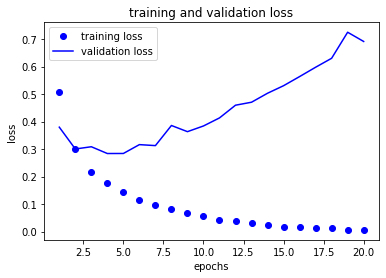

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='training loss')
plt.plot(epochs, val_loss_values, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show();

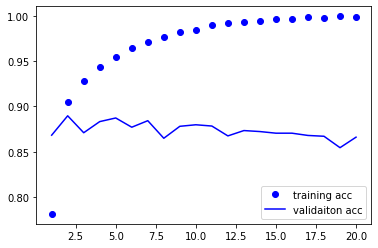

In [25]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='training acc')
plt.plot(epochs, val_acc_values, 'b', label='validaiton acc')
plt.legend()
plt.show();

In [27]:
# retrain model from scratch with 4 epochs to test on test data

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 127us/step - loss: 0.4580 - acc: 0.8174
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2616 - acc: 0.9079
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2008 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 4s 160us/step


In [28]:
model.predict(x_test)

array([[0.2224532 ],
       [0.999802  ],
       [0.8680446 ],
       ...,
       [0.13877925],
       [0.11354202],
       [0.58759993]], dtype=float32)

In [30]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [31]:
len(train_data), len(test_data)

(8982, 2246)

In [33]:
# to decode back to words

# word_index = reuters.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.get_items()])
# decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [34]:
train_labels[10]

3

In [37]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [38]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [40]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [44]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 250us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 108us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


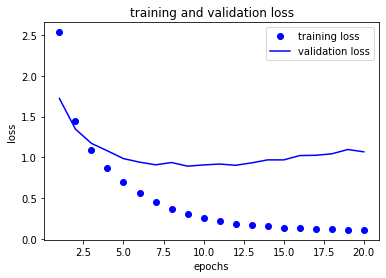

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show();

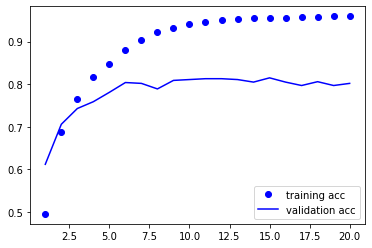

In [46]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.legend()
plt.show();

In [47]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 161us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 110us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 145us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1304 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 104us/step - loss: 0.7976 - acc: 0.8252 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.6393 - acc: 0.8626 - val_loss: 0.9758 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9105 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.4128 - acc: 0.9136 - val_loss: 0.8930 - val_acc: 0.8210
Epoch 8/

In [48]:
results

[1.0231022236077572, 0.774265360694216]

In [49]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [50]:
predictions = model.predict(x_test)

In [51]:
predictions[0].shape

(46,)

In [52]:
np.sum(predictions[0])

1.0000001

In [53]:
np.argmax(predictions[0])

3

In [ ]:
# hold out validation

num_validation_samples = 10000

np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

training data = data[:]

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# at this point can tune, retrain, evaluate, etc

model = get_model()
model.train(np.concatenate([training_data, validation_data]))
test_score = model.evaluate(test_data)

In [ ]:
# k-fold cross validation

k = 4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:
                          num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] +    # + is list concat not summation
                        data[num_validation_samples * (fold + 1) :]
        
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
    validation_score = np.average(validation_scores)
    
    model = get_model()
    model.train(data)
    test_score = model.evaluate(test_data)

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

W0816 17:22:21.641576 4432115136 deprecation.py:506] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 38s 638us/sample - loss: 0.1616 - acc: 0.9492
Epoch 2/5
60000/60000 [==============================] - 36s 606us/sample - loss: 0.0456 - acc: 0.9859
Epoch 3/5
60000/60000 [==============================] - 34s 573us/sample - loss: 0.0325 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 34s 562us/sample - loss: 0.0242 - acc: 0.9926
Epoch 5/5
60000/60000 [==============================] - 33s 551us/sample - loss: 0.0191 - acc: 0.9941


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 203us/sample - loss: 0.0307 - acc: 0.9903


0.9903

In [3]:
import os, shutil

base_dir = '/Users/mattmastin/Desktop/dogs-vs-cats'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test1')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cat')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dog')
# os.mkdir(train_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cat')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dog')
# os.mkdir(test_dogs_dir)

In [7]:
# cat dog convnet
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
# def generator():
#     i = 0
#     while True:
#         i += 1

# for item in generator():
#     print(item)
#     if item > 4:
#         break

In [13]:
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

NameError: name 'input_sequence' is not defined

In [15]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t
    
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

loading data...
25000 train sequences
25000 test sequences
pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [21]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

W0822 16:32:33.654021 4704855488 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 16:32:33.661951 4704855488 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 16:32:34.085757 4704855488 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 939us/step - loss: 0.5644 - acc: 0.7023 - val_loss: 0.6928 - val_acc: 0.6660
Epoch 2/10
20000/20000 [==============================] - 18s 907us/step - loss: 0.3608 - acc: 0.8533 - val_loss: 0.4026 - val_acc: 0.8188
Epoch 3/10
20000/20000 [==============================] - 18s 897us/step - loss: 0.2876 - acc: 0.8901 - val_loss: 0.4030 - val_acc: 0.8396
Epoch 4/10
20000/20000 [==============================] - 18s 899us/step - loss: 0.2246 - acc: 0.9157 - val_loss: 0.4397 - val_acc: 0.8446
Epoch 5/10
20000/20000 [==============================] - 18s 903us/step - loss: 0.1891 - acc: 0.9304 - val_loss: 0.3764 - val_acc: 0.8376
Epoch 6/10
20000/20000 [==============================] - 18s 892us/step - loss: 0.1523 - acc: 0.9475 - val_loss: 0.3783 - val_acc: 0.8428
Epoch 7/10
20000/20000 [==============================] - 18s 876us/step - loss: 0.1136 - acc: 0.9597 - val_loss: 0.5

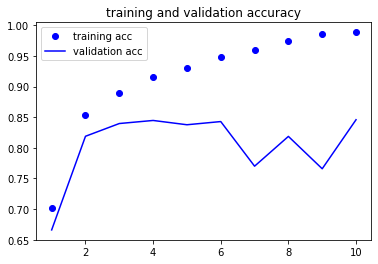

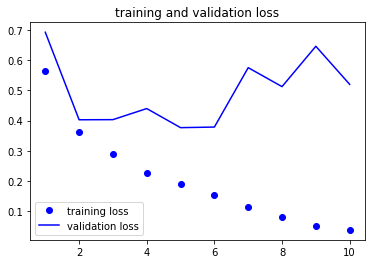

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show();

In [24]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.5073 - acc: 0.7593 - val_loss: 0.3527 - val_acc: 0.8666
Epoch 2/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.2838 - acc: 0.8886 - val_loss: 0.5996 - val_acc: 0.8206
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2270 - acc: 0.9117 - val_loss: 0.3030 - val_acc: 0.8810
Epoch 4/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1972 - acc: 0.9265 - val_loss: 0.3332 - val_acc: 0.8552
Epoch 5/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.1736 - acc: 0.9360 - val_loss: 0.3208 - val_acc: 0.8860
Epoch 6/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.1596 - acc: 0.9453 - val_loss: 0.4210 - val_acc: 0.8702
Epoch 7/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1454 - acc: 0.9495 - val_loss: 0.3368 - val_acc:

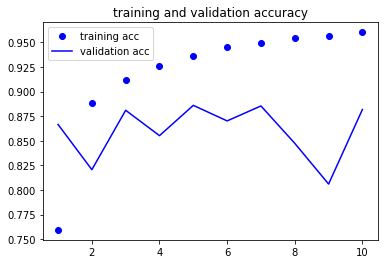

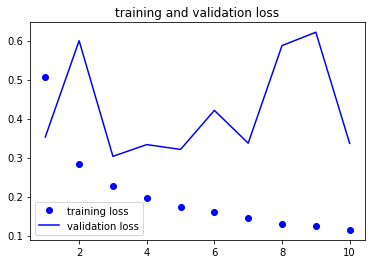

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show();

In [1]:
import os

data_dir = '/Users/mattmastin/Desktop/jena_climate_2009_2016.csv'

f = open(data_dir)
data = f.read()
f.close

<function TextIOWrapper.close()>

In [2]:
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [4]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [5]:
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

NameError: name 'plt' is not defined

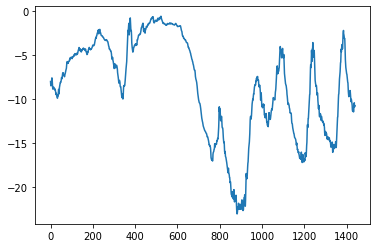

In [32]:
plt.plot(range(1440), temp[:1440])

In [6]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [7]:
def generator(data, lookback, delay, min_index, max_index,
             shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback,
                                    max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [8]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=0,
                     max_index=200000,
                     shuffle=True,
                     step=step,
                     batch_size=batch_size)
val_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=200001,
                     max_index=300000,
                     step=step,
                     batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300000,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [9]:
# baseline approach
# np.mean(np.abs(preds - targets)) # MAE

def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

evaluate_naive_method()

KeyboardInterrupt: 

In [40]:
celsius_mae = 0.29 * std[1]
celsius_mae

2.5672247338393395

In [50]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=20,
                             validation_data=val_gen,
                             validation_steps=val_steps)

Epoch 1/20
498/500 [============================>.] - ETA: 0s - loss: 1.2224

StopIteration: 

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show();

In [55]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=20,
                             validation_data=val_gen,
                             validation_steps=val_steps)

Epoch 1/20
499/500 [============================>.] - ETA: 0s - loss: 0.3023

KeyboardInterrupt: 